# Homework II - Aprendizagem

**Afonso da Conceição Ribeiro**, 102763
<br>
**Miguel Gomes Marques Pessanha de Almeida**, 103493

## I. Pen and Paper [13v]

**Consider the following dataset:**

<body>
  <table>
    <tr>
      <th>D</th>
      <th>y<sub>1</sub></th>
      <th>y<sub>2</sub></th>
      <th>y<sub>3</sub></th>
      <th>y<sub>4</sub></th>
      <th>y<sub>5</sub></th>
      <th>y<sub>6</sub></th>
    </tr>
    <tr>
      <td><b>x<sub>1</sub></b></td>
      <td>0.24</td>
      <td>0.36</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>A</td>
    </tr>
    <tr>
      <td><b>x<sub>2</sub></b></td>
      <td>0.16</td>
      <td>0.48</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
      <td>A</td>
    </tr>
    <tr>
      <td><b>x<sub>3</sub></b></td>
      <td>0.32</td>
      <td>0.72</td>
      <td>0</td>
      <td>1</td>
      <td>2</td>
      <td>A</td>
    </tr>
    <tr>
      <td><b>x<sub>4</sub></b></td>
      <td>0.54</td>
      <td>0.11</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>B</td>
    </tr>
    <tr>
      <td><b>x<sub>5</sub></b></td>
      <td>0.66</td>
      <td>0.39</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>B</td>
    </tr>
    <tr>
      <td><b>x<sub>6</sub></b></td>
      <td>0.76</td>
      <td>0.28</td>
      <td>1</td>
      <td>0</td>
      <td>2</td>
      <td>B</td>
    </tr>
    <tr>
      <td><b>x<sub>7</sub></b></td>
      <td>0.41</td>
      <td>0.53</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
      <td>B</td>
    </tr>
    <tr>
      <td><b>x<sub>8</sub></b></td>
      <td>0.38</td>
      <td>0.52</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>A</td>
    </tr>
    <tr>
      <td><b>x<sub>9</sub></b></td>
      <td>0.42</td>
      <td>0.59</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
      <td>B</td>
    </tr>
  </table>
</body>


### 1)

**Consider x<sub>1</sub>–x<sub>7</sub> to be training observations, x<sub>8</sub>–x<sub>9</sub> to be testing observations, y<sub>1</sub>–y<sub>5</sub> to be input variables and y<sub>6</sub> to be the target variable.
<br>
Hint: you can use scipy.stats.multivariate_normal for multivariate distribution calculus**

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import sklearn

df = pd.read_csv("./hw2data.csv")
display(df)

,y1,y2,y3,y4,y5,y6
0,0.24,0.36,1,1,0,A
1,0.16,0.48,1,0,1,A
2,0.32,0.72,0,1,2,A
3,0.54,0.11,0,0,1,B
4,0.66,0.39,0,0,0,B
5,0.76,0.28,1,0,2,B
6,0.41,0.53,0,1,1,B
7,0.38,0.52,0,1,0,A
8,0.42,0.59,0,1,1,B


#### a. [3.5v]

**Learn a Bayesian classifier assuming: i) {y<sub>1</sub>, y<sub>2</sub>}, {y<sub>3</sub>, y<sub>4</sub>} and {y<sub>5</sub>} sets of independent variables (e.g., y<sub>1</sub> ⫫ y<sub>3</sub> yet y<sub>1</sub> ⫫̸ y<sub>2</sub>), and ii) y<sub>1</sub> × y<sub>2</sub> ∈ ℝ<sup>2</sup> is normally distributed. Show all parameters (distributions and priors for subsequent testing).**

In [354]:
df_training = df.drop(df.index[7:9])

y1 = df_training["y1"]
y2 = df_training["y2"]

mean1 = np.mean(y1)
sd1 = np.std(y1, ddof=1)
mean2 = np.mean(y2)
sd2 = np.std(y2, ddof=1)
cov12 = np.cov(y1, y2)

y1_A = y1[df_training["y6"] == "A"]
y2_A = y2[df_training["y6"] == "A"]

mean1_A = np.mean(y1_A)
sd1_A = np.std(y1_A, ddof=1)
mean2_A = np.mean(y2_A)
sd2_A = np.std(y2_A, ddof=1)
cov12_A = np.cov(y1_A, y2_A)

y1_B = y1[df_training["y6"] == "B"]
y2_B = y2[df_training["y6"] == "B"]

mean1_B = np.mean(y1_B)
sd1_B = np.std(y1_B, ddof=1)
mean2_B = np.mean(y2_B)
sd2_B = np.std(y2_B, ddof=1)
cov12_B = np.cov(y1_B, y2_B)

mn = st.multivariate_normal(mean=[mean1, mean2], cov=cov12)
mn_A = st.multivariate_normal(mean=[mean1_A, mean2_A], cov=cov12_A)
mn_B = st.multivariate_normal(mean=[mean1_B, mean2_B], cov=cov12_B)


#### b. [2.5v]

**Under a MAP assumption, classify each testing observation showing all your calculus.**

In [355]:
x8 = df.iloc[7, :]
x9 = df.iloc[8, :]

print("p(x8|y6='A') = ", mn_A.pdf(x8[["y1", "y2"]]))
print("p(x8|y6='B') = ", mn_B.pdf(x8[["y1", "y2"]]))
print("p(x9|y6='A') = ", mn_A.pdf(x9[["y1", "y2"]]))
print("p(x9|y6='B') = ", mn_B.pdf(x9[["y1", "y2"]]))

p(x8|y6='A') =  0.9847047567047768
p(x8|y6='B') =  1.9623691378628592
p(x9|y6='A') =  0.4030709859326153
p(x9|y6='B') =  1.7285705872234585


#### c. [2v]

**Consider that the default decision threshold of θ = 0.5 can be adjusted according to**

$
f(\textbf{x}|\theta) =
\begin{cases}
A & P(A|\textbf{x}) > \theta \\
B & \text{otherwise}
\end{cases}
$

**Under a maximum likelihood assumption, what thresholds optimize testing accuracy?**

### 2)

**Let y<sub>1</sub> be the target numeric variable, y<sub>2</sub>-y<sub>6</sub> be the input variables where y<sub>2</sub> is binarized under an equal-width (equal-range) discretization. For the evaluation of regressors, consider a 3-fold cross-validation over the full dataset (x<sub>1</sub>-x<sub>9</sub>) without shuffling the observations.**

#### a. [1v]

**Identify the observations and features per data fold after the binarization procedure.**

In [3]:
df_bin = df.copy()
df_bin["y2"] = np.where(df_bin["y2"] <= 0.5, 0, 1)

datafold1 = df_bin.iloc[0:3, :]
datafold2 = df_bin.iloc[3:6, :]
datafold3 = df_bin.iloc[6:9, :]

display(datafold1, datafold2, datafold3)

,y1,y2,y3,y4,y5,y6
0,0.24,0,1,1,0,A
1,0.16,0,1,0,1,A
2,0.32,1,0,1,2,A


,y1,y2,y3,y4,y5,y6
3,0.54,0,0,0,1,B
4,0.66,0,0,0,0,B
5,0.76,0,1,0,2,B


,y1,y2,y3,y4,y5,y6
6,0.41,1,0,1,1,B
7,0.38,1,0,1,0,A
8,0.42,1,0,1,1,B


#### b. [4v]

**Consider a distance-weighted kNN with k=3, Hamming distance (d), and 1/d weighting. Compute the MAE of this kNN regressor for the 1<sup>st</sup> iteration of the cross-validation (i.e. train observations have the lower indices).**

## II. Programming and critical analysis [7v]

**Considering the column_diagnosis.arff dataset available at the course webpage’s homework tab.
<br>
Using sklearn, apply a 10-fold stratified cross-validation with shuffling (random_state=0) for the assessment of predictive models along this section.**

In [370]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [371]:
# Data Loading
from scipy.io.arff import loadarff
data = loadarff("./column_diagnosis.arff")
df = pd.DataFrame(data[0])
df["class"] = df["class"].str.decode("utf-8")

# Data Preprocessing
X = df.drop("class", axis=1)
y = df["class"]

In [437]:
# Apply 10-fold stratified cross validation with shuffle
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

### 1) [3v]

**Compare the performance of kNN with k=5 and naïve Bayes with Gaussian assumption (consider all remaining parameters for each classifier as sklearn’s default):**

In [373]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

predictor_knn = KNeighborsClassifier(n_neighbors=5)
predictor_nb = GaussianNB()

knn_predictions = []
nb_predictions = []

knn_accuracy = []
nb_accuracy = []

for train_i, test_i in skf.split(X, y):
    X_train = X.iloc[train_i]
    X_test = X.iloc[test_i]
    y_train = y.iloc[train_i]
    y_test = y.iloc[test_i]

    # Data Normalization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Model Fitting
    predictor_knn.fit(X_train, y_train)
    predictor_nb.fit(X_train, y_train)

    knn_predictions.append(predictor_knn.predict(X_test))
    nb_predictions.append(predictor_nb.predict(X_test))

    knn_accuracy.append(predictor_knn.score(X_test, y_test))
    nb_accuracy.append(predictor_nb.score(X_test, y_test))

#### a.

**Plot two boxplots with the fold accuracies for each classifier.**

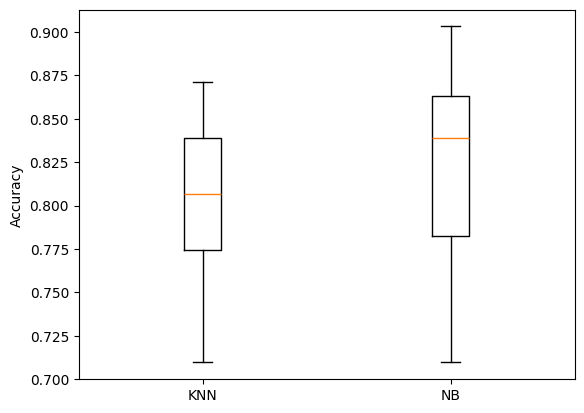

In [374]:
plt.boxplot([knn_accuracy, nb_accuracy])
plt.xticks([1, 2], ["KNN", "NB"])
plt.ylabel("Accuracy")
plt.show()

#### b.

**Using scipy, test the hypothesis "kNN is statistically superior to Naïve Bayes regarding accuracy", asserting whether is true.**

In [375]:
from scipy.stats import ttest_rel

# Is KNN better than NB?
res = ttest_rel(knn_accuracy, nb_accuracy, alternative="greater")
print ("Is KNN better than NB?\tp:", res.pvalue)

Is KNN better than NB?	p: 0.9557048023442668


H0: accuracy_knn = accuracy_nb (both models perform equally well)

H1: accuracy_knn > accuracy_nb (kNN is statistically superior to Naïve Bayes)

Based on the T-test used to compare both accuracy distributions, we obtain a p-value of aproximately 95.6%. As so, the hypothesis H0 should not be rejected for the usual signficance levels (1%, 5%, 10%), which indicates a strong evidence for both models performing equally well on this metric.

### 2) [2.5v]

**Consider two kNN predictors with k=1 and k=5 (uniform weights, Euclidean distance, all remaining parameters as default). Plot the differences between the two cumulative confusion matrices of the predictors. Comment.**

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

predictor_knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
predictor_knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

knn1_predictions = []
knn5_predictions = []
y_test_list = []

for train_i, test_i in skf.split(X, y):
    X_train = X.iloc[train_i]
    X_test = X.iloc[test_i]
    y_train = y.iloc[train_i]
    y_test = y.iloc[test_i]

    # Data Normalization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Model Fitting
    predictor_knn1.fit(X_train, y_train)
    predictor_knn5.fit(X_train, y_train)

    knn1_predictions += predictor_knn1.predict(X_test).tolist()
    knn5_predictions += predictor_knn5.predict(X_test).tolist()
    y_test_list += y_test.tolist()

# Cumulative Confusion Matrices
cm_knn1 = np.array(confusion_matrix(y_test_list, knn1_predictions))
cm_knn5 = np.array(confusion_matrix(y_test_list, knn5_predictions))

knn1_df = pd.DataFrame(cm_knn1, 
    index=["Hernia", "Spondylolisthesis", "Normal"], 
    columns=["Predicted Hernia", "Predicted Spondylolisthesis", "Predicted Normal"])

knn5_df = pd.DataFrame(cm_knn5, 
    index=["Hernia", "Spondylolisthesis", "Normal"], 
    columns=["Predicted Hernia", "Predicted Spondylolisthesis", "Predicted Normal"])

# Calculate the difference between the two DataFrames
cm_diff = knn1_df - knn5_df

# Plot the difference heatmap using Matplotlib
plt.figure(figsize=(10, 6))
plt.title("Difference between the Cumulative Confusion Matrices")

cax = plt.imshow(cm_diff, cmap="Blues", aspect="auto")

# Add annotations to the heatmap
for i in range(cm_diff.shape[0]):
    for j in range(cm_diff.shape[1]):
        plt.text(j, i, str(cm_diff.iloc[i, j]), \
        va='center', ha='center', fontsize=18, color ="black" if cm_diff.iloc[i, j] < 0 else "white")

cbar = plt.colorbar(cax)
cbar.set_label('Difference')

plt.xticks(range(len(cm_diff.columns)), cm_diff.columns, ha='center')
plt.yticks(range(len(cm_diff.index)), cm_diff.index, rotation=90, va='center')
plt.show()

### 3) [1.5v]

**Considering the unique properties of column_diagnosis, identify three possible difficulties of Naïve Bayes when learning from the given dataset.**

The Naïve Bayes approach may cause some difficulties when drawing conclusions from the results of analysis.

Firstly, it assumes that all features are independent, which can lead to suboptimal performance when dealing with correlated features. In our dataset, for instance, it is hard to believe that attributes like `pelvic_incidence` and `pelvic_tilt` have no relationship whatsoever.

Furthermore, it assumes that output classifications themselves are independent. Evidently, if an individual has an Hernina condition, its chances of also contracting Spondylolithesis are relatedly higher. Therefore this method is not applicable in the `column_diagnosis` dataset.

Finally, any unbalancement in the class distribution of the training dataset will inevitably set a bias for the model torwards the class with the highest number of samples. In our example, the model's predictions would manifestly lean torwards the Spondylolithesis class.